# A walk in the park

Using available public data, are there correlations between variables that professional sports teams have not yet thought of?


Data scientists can take upt to 80% of their time sourcing and cleaning data (source: [forbes.com][1]). Initially I had created this notebook detailing both the sourcing and cleaning steps along with the visualisation code, however it quickly became to lengthy.

So if reading about sourcing, scraping and cleaning data is more your bag, check out my notebook here that details the steps I went to to prepare the data for this execise.

This notebook focuses purely on the visualisation and analysis. Question 1 uses a single dataset from aussportbetting.com with all fixtrues since 2009. Question 2 uses additionaly data sourced from bom.gov.au to get weather records. Question 3 uses data from various sources across the internet - all sources cited here ([Data sources](#data-sources)).  

To make it easier to run the visualisation code, I have uploaded the cleaned and processed dataframes as raw git files to enable the code snippets to run.

Using visualisation tools ggplot and plotly, I use a number visualisations and techniques to explore the data.

1. [Question 1: Are there any significant differences between teams, looking only at the game stats? ](#question-1)
1. [Question 2: Does the average temperature affect team performance?](#question-2)
1. [Question 3: Is there a different body type between professional codes?](#question-3)
1. [Data sources](#data-sources)
1. [Installed packages and technology](#packages)



[1]: https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/#7f441d5b6f63



## <a id="question-1"> Question 1: Are there any significant differences between teams, looking only at the game stats?</a>

Using the afl fixtures spreadsheet, I first visualise the total Goals/Behinds between teams.

### What is the relative ranking of teams comparing total number of goals?

Lets plot a frequency bar chart and order it by goals kicked.

In [5]:

library(repr)
library(ggplot2)
library(RCurl)
library(gridExtra)
library(dplyr)
library(plotly)

# turn off warnings 
options(warn=-1)


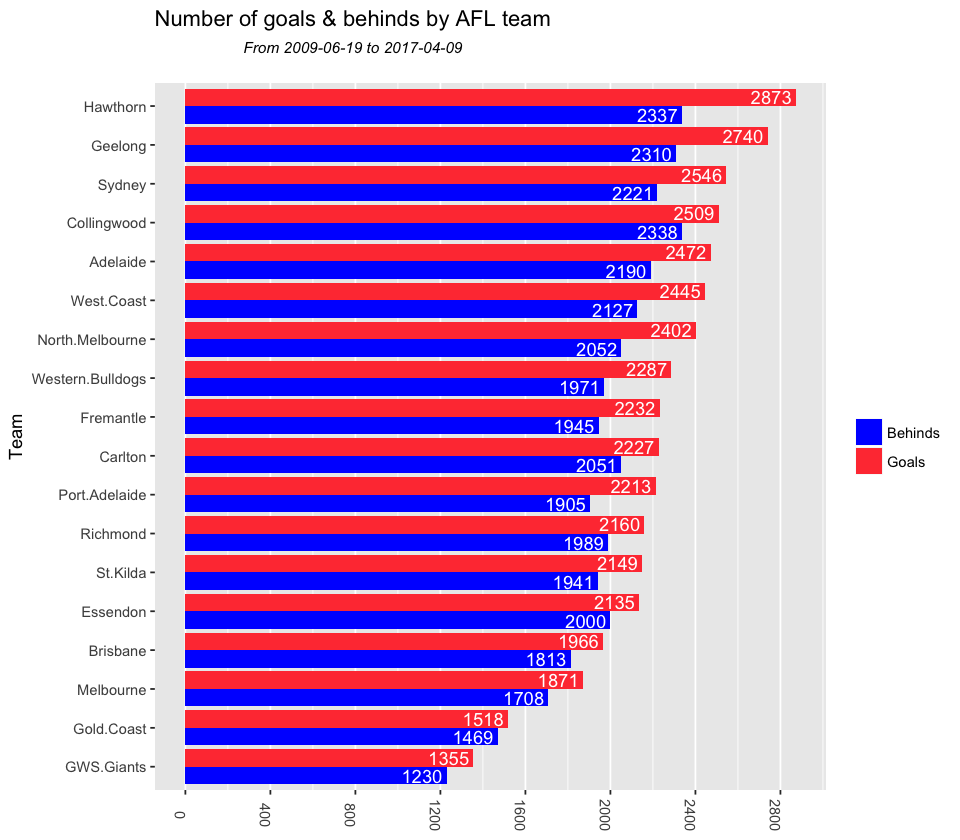

In [7]:
# control output of plot
options(repr.plot.width=8, repr.plot.height=7)

# get the data
url <- 'https://raw.githubusercontent.com/axelk2014/datablog/master/dfkicksm.csv'
df.kicks.m <- getURL(url) 
df.kicks.m <- read.csv(textConnection(df.kicks.m))

# re-order the factor levels to display plot in descending order
df.kicks.m$Team <- factor(df.kicks.m$Team, levels=na.omit(df.kicks.m[which(df.kicks.m$variable == "Goals"),1][ order(df.kicks.m$value, decreasing = FALSE)]))

title.plot <- "Number of goals & behinds by AFL team" 
subtitle.plot <- "From 2009-06-19 to 2017-04-09"

ggplot(df.kicks.m, aes(Team,as.numeric(value),fill=variable)) + geom_bar(position = position_dodge(width = NULL),stat="identity")+
  geom_text(data=df.kicks.m, aes(label=as.numeric(value), fontface=.5,hjust=1.1), position = position_dodge(width=.95),colour= "white") + 
  theme(axis.text.x=element_text(angle=-90)) + scale_fill_manual(values=c("#0000ff", "#ff4040")) +
  labs(fill="") + scale_y_continuous(breaks=seq(0,2800, 400)) + ylab(NULL) + coord_flip() + 
  theme(panel.grid.major.y = element_blank()) + 
  ggtitle(bquote(atop(.(title.plot), atop(italic(.(subtitle.plot)), ""))))



Note that this chart displayes the total *number* of goals and behinds, and not the points. <a href="#footnote1" id="footnote1ref"><sup>1</sup></a>

##### Analysis: 
Not much surprise here, the teams with the most goals and behinds (Hawthorn, Geelong) are the  currently very good teams. GWS and Gold Coast have significantly lower tallies because those teams were only created in the year 2012 and 2011 respectively.


##### Visualisation: 
The trickiest thing about this plot was trying to get the data labels aligned with the correct bar. As I was using `geom_bar(position = position_dodge...)` to position the the bars, a **lot** of time and experimentation went into understanding how ggplot places labels on dodged bars. 
**Hint:** it's not absolute positioning, and the number in 
```
position = position_dodge(width=.95)
```
is a proportional value, which is a combination of bar width, number of bars, position of Venus and the relative humidity value in [insert any city name]. This was seriously one of the most frustrating things I have ever dealt with in ggplot. As a result, I would strongly recommend never using `position_dodge` if data labels are required.


#### Does it change the team ranking if we look at ratio of goals to behinds?

A simple table will do here:

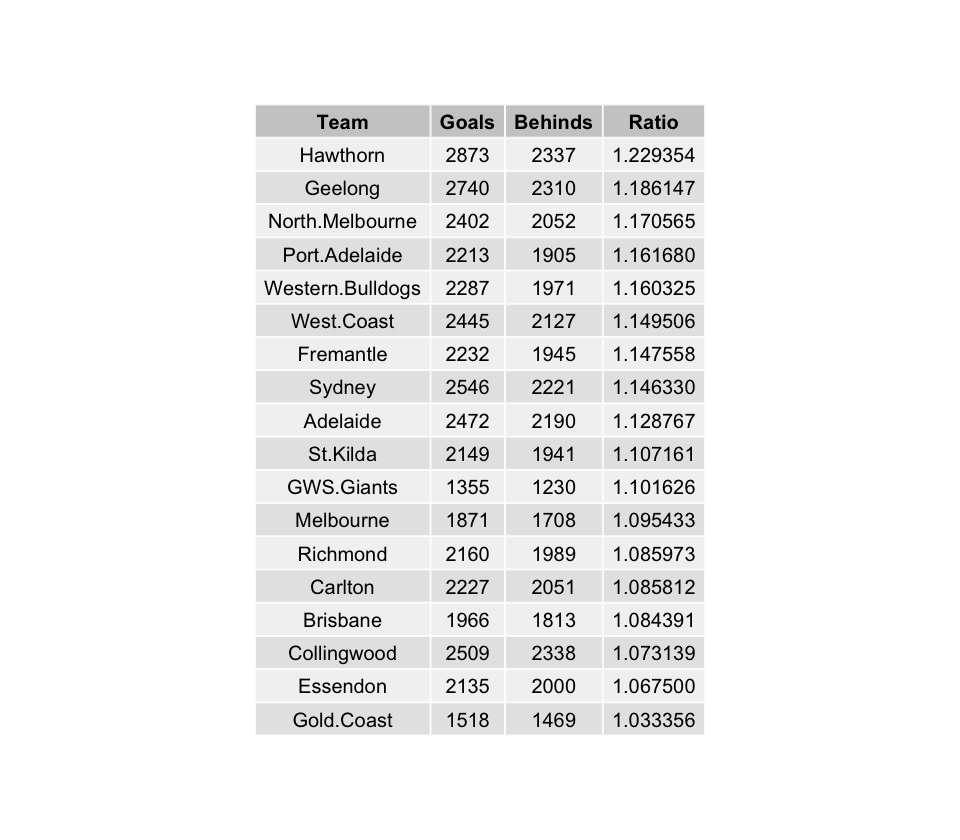

In [8]:
# get the data
url <- 'https://raw.githubusercontent.com/axelk2014/datablog/master/dfkicks.csv'
df.kicks <- getURL(url) 
df.kicks <- read.csv(textConnection(df.kicks))

t1 <- tableGrob(df.kicks[order(df.kicks$Ratio, decreasing=TRUE),],rows=NULL)

grid.arrange(t1)

##### Analysis: 
Rank 1 and 2 are the same however that's where it ends. The "goals to behinds" ratio statistic is pretty much useless in helping to comparing teams (ie as much as I hate to say it, Collingwood would not be the 3rd worst team in the AFL). 

Further investigation would suggests looking inot the ratio of successful "shots at goal". The current dataset does not have this data.

##### Visualisation: 
The default theme in tableGrobs to display tables is OK, however not the easiest to tweak. I will show later in this notebook a better R method to display tables.

##### Is there a significant difference between teams that wins at Away games vs Home games?

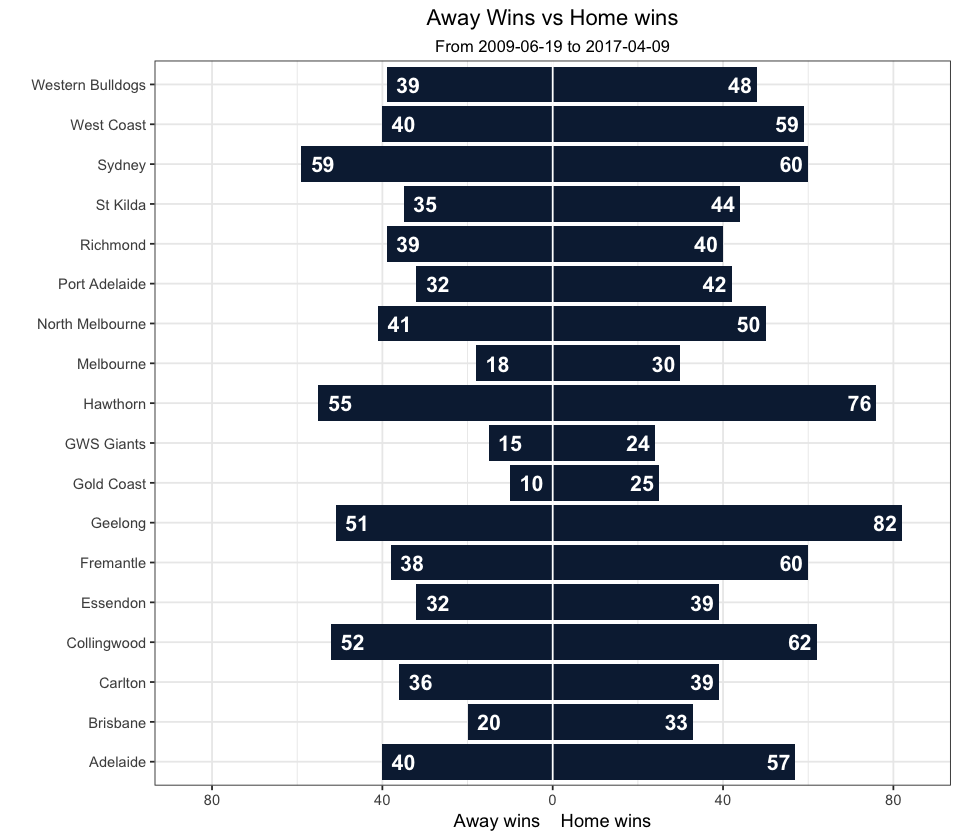

In [9]:
# get the data
url <- 'https://raw.githubusercontent.com/axelk2014/datablog/master/dfplotawayvshome.csv'
df.plot.homevsaway <- getURL(url) 
df.plot.homevsaway <- read.csv(textConnection(df.plot.homevsaway))

title.plot = "Away Wins vs Home wins"
subtitle.plot <- "From 2009-06-19 to 2017-04-09"

ggplot(df.plot.homevsaway, aes(x=Home.Team, y=Home.wins)) + geom_bar(stat = "identity", fill= "#0C2340") +
  geom_bar(aes(x=Home.Team, y=-Away.wins ),  fill= "#0C2340", stat="identity") +
  geom_hline(yintercept = -0,colour = "white") + 
  geom_text(data=df.plot.homevsaway, aes(x=Home.Team, y=Home.wins, label=Home.wins, size=1, hjust=1.2, fontface=2), colour="white") +
  geom_text(data=df.plot.homevsaway, aes(x=Home.Team, y=-Away.wins, label=Away.wins, size=1, hjust=-0.4, fontface=2), colour="white") +
  scale_y_continuous(limits=c(-85,85),breaks=c(-80,-40,0,40,80), labels=c("80","40", "0","40","80")) +
  coord_flip() + labs(x="", y="Away wins    Home wins", title=title.plot, subtitle=subtitle.plot) + theme_bw() + 
  theme(legend.position="none",plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5))


###### Analysis:
Absolute numbers tell a story - there is a definite skew towards home ground wins. The most interesting statistic is that one team (Sydney) has an almost equal number of wins, Home or Away. Why could this be? <br>

The next visualisation will look deeper at the data.

###### Visualisation:
Initially I created the visualisation with team colours, using primary team colours for the bars and secondary colours for the labels.
It looked like this:

![Away-Homewins_byTeam_colours.png](Away-Homewins_byTeam_colours.png)

The reason for the differences in colour bars and numbers is not immediately apparent to the viewer (ie the colours selected were for aesthetic reasons only), and it could lead viewers to incorrect conclusions. So I settled on the blue and white colours scheme which standardises the colours and allows for the maximum contrast between the data (bars) and the labels.

To account for the fact that GWS and Gold Coast have played a total number of games less than all other teams, lets check out the percentage wins home and away.

#### Plot pecentage of wins in home and away games, ranked

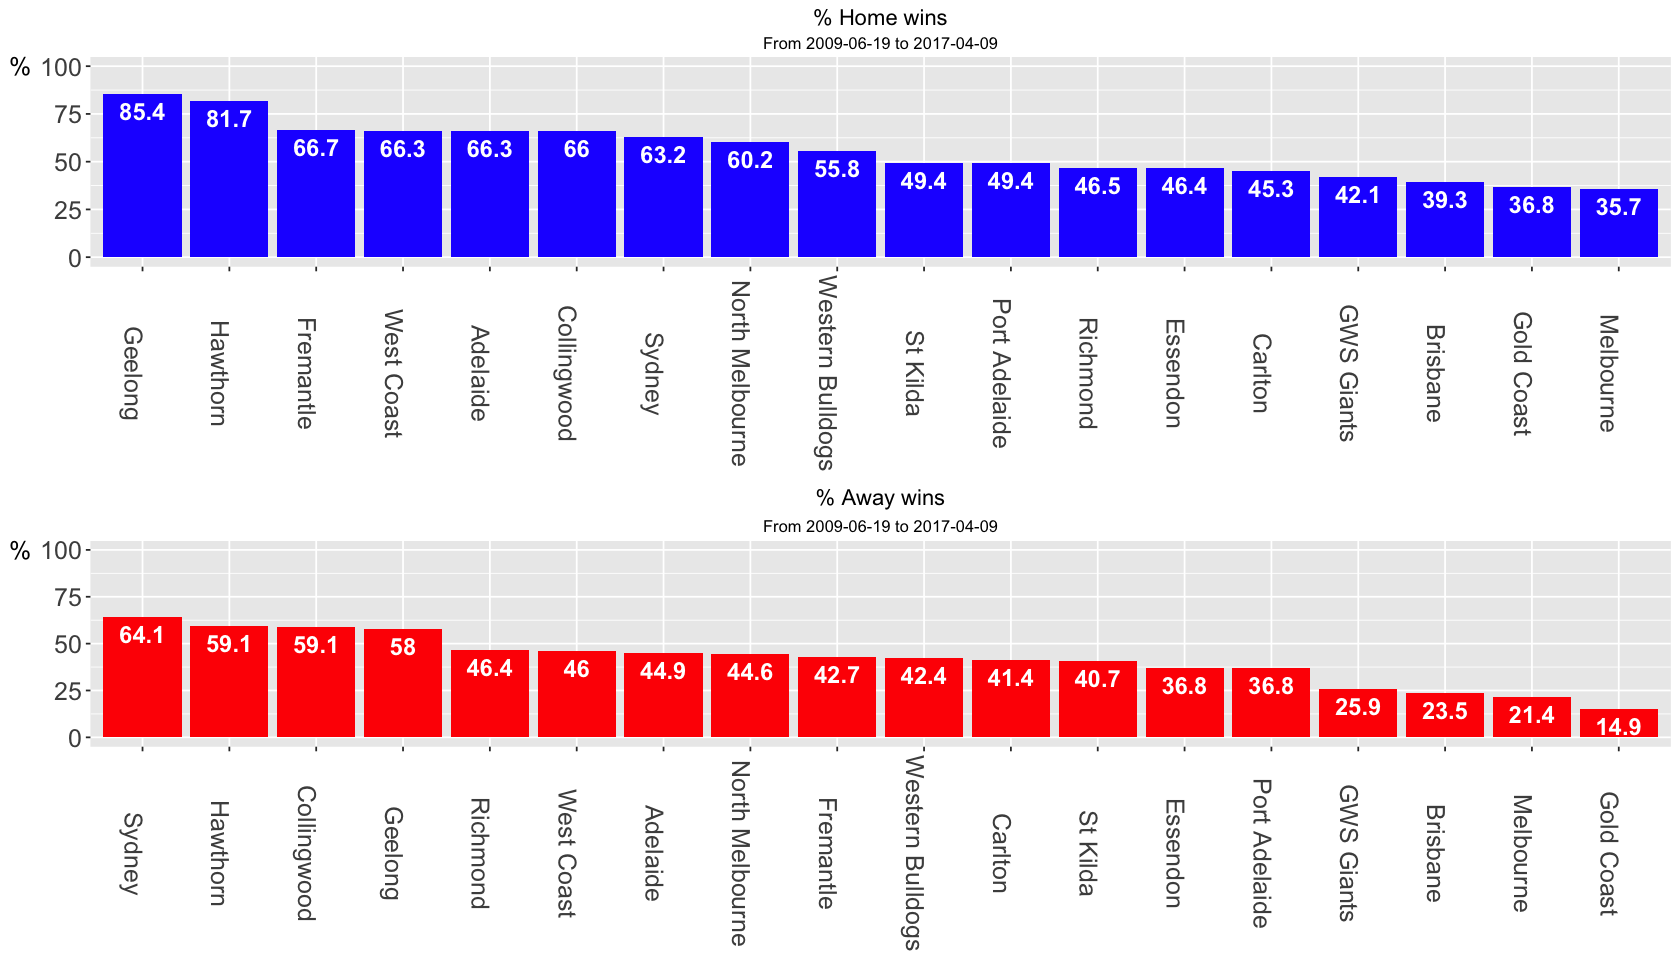

In [10]:
# get the data
url <- 'https://raw.githubusercontent.com/axelk2014/datablog/master/dfpercentageawaywins.csv'
df.plot.percentage.awaywins <- getURL(url) 
df.plot.percentage.awaywins <- read.csv(textConnection(df.plot.percentage.awaywins))

# re-order the plot by ranking order
df.plot.percentage.awaywins$Team <- factor(df.plot.percentage.awaywins$Team, levels=df.plot.percentage.awaywins[order(df.plot.percentage.awaywins$value, decreasing=TRUE),1]) 

title.plot = "% Away wins"

p5a <-ggplot(df.plot.percentage.awaywins, aes(x=Team, y=value)) + geom_bar(stat="identity",fill="#FF0000") +
  geom_text(data=df.plot.percentage.awaywins, aes(x=Team, y=value, label=round(df.plot.percentage.awaywins$value,3) * 100),position="identity", fontface="bold",size=5, vjust=1.5, colour="white",show.legend = F) +
  scale_y_continuous(limits=c(0,1), breaks=c(0,0.25,0.5,0.75,1), labels=c("0","25","50","75","100")) + 
  scale_fill_manual(labels=c("% Away game wins","% Home game wins"), values=c("#FF0000","#222DFF")) + #coord_cartesian(ylim = (0, 1)) +
  labs(y="%", title=title.plot, subtitle=subtitle.plot,x=NULL) + 
  theme(legend.position="none",axis.text.x=element_text(angle=-90,size=15),axis.title.y = element_text(angle=0,size=15),axis.text.y=element_text(size=15),plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5))  

# get the data
url.h <- 'https://raw.githubusercontent.com/axelk2014/datablog/master/dfpercentagehomewins.csv'
df.plot.percentage.homewins <- getURL(url.h) 
df.plot.percentage.homewins <- read.csv(textConnection(df.plot.percentage.homewins))

# re-order the plot by ranking order
df.plot.percentage.homewins$Team <- factor(df.plot.percentage.homewins$Team , levels=df.plot.percentage.homewins[order(df.plot.percentage.homewins$value, decreasing=TRUE),1]) 

title.plot = "% Home wins"

p5h <-ggplot(df.plot.percentage.homewins, aes(x=Team, y=value)) + geom_bar(stat="identity", fill="#222DFF") +
  geom_text(data=df.plot.percentage.homewins, aes(x=Team, y=value, label=round(df.plot.percentage.homewins$value,3) * 100),position="identity", fontface="bold",size=5, vjust=1.5, colour="white",show.legend = F) +
  scale_y_continuous(limits=c(0,1), breaks=c(0,0.25,0.5,0.75,1), labels=c("0","25","50","75","100")) + 
  scale_fill_manual(labels=c("% Home game wins"), values=c("#222DFF")) + #coord_cartesian(ylim = (0, 1)) +
  labs(y="%", title=title.plot, subtitle=subtitle.plot, x=NULL) + 
  theme(legend.title=element_blank(),axis.text.x=element_text(angle=-90,size=15),axis.title.y = element_text(angle=0,size=15),axis.text.y=element_text(size=15),plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5))  

# control output of plot
options(repr.plot.width=14, repr.plot.height=8)

grid.arrange(p5h,p5a)

##### Analysis:
The top plot shows what is to be expected that the 'strongest' teams win more games when playing home grounds. However 4 teams win over 50% of their away games, with the clear leader being Sydney. Sydney is currently (as of 29/4/2017) 18th in the league out of 18 teams. So how is it that they are so low in the ranking when playing 'so well' according to the stats? Well it has more to do with the history of the team and the culture supporting it.

Sydney was the first non-Victorian team in the AFL. They used to be known as South Melbourne and relocated to Sydney in 1982 (source: https://en.wikipedia.org/wiki/Sydney_Swans). However 90% of the ALF teams were still based in Victoria, so the "Sydney Swans" had to spend most of their season playing away games. I would suggest that whatever cultural/training influences enabled it to grow into an effective team, with practice playing more away games than any other team, could account for Sydney coming 1st in the ranking of total percentage Away games winner.


##### Visualisation:
I initially had these plots sided by side, with nicer looking (thinner) bars, however the data label was at a size and weight that made it too difficult to make out in the resolution of this notebook - increasing the size the of the label only made it overlap on neighbouring bars. So I changed the plots to display one above the other one to make the labels and ranking clearer. 

#### Plotly plot - percentage of wins by team by venue

**Note:**
With 19 stadiums and 18 teams, the only way to sensibly view and analyse and compare the data would be using an interactive tool. I chose to develop the visualisation in R using the plotly API. 

*Plotly link supplied instead of embedding this graph in the notebook as default plot height cuts off the bottom of the plot*  

| Plotly link | Thumbnail |
|----------------------------------------------------------------------------|--------------------------------------|
|[https://plot.ly/~adk2017/22/](https://plot.ly/~adk2017/22/ "Plotly link")|[![PercentagewinsbyVenue](percentagewinsbyvenuall.png)](https://plot.ly/~adk2017/22/ "Plotly: Temperature VS Score") |


##### Analysis + Visualisation:

Whilst creating this visualisation was "fun", the aggregate view is too busy to get any real information. There is a hover over label that will help the user identify values, with team toggle button below the graph enabling single views.

There are a number of teams who seem to win 100% when playing at certain venues - all data cleaning code and data is available, so feel free to run your own analysis. If I have made a mistake, please let me know.

All the above visualistations above were created from the same single data source.

Now lets see what we can do if we bring a few other data sources in.


## <a id="question-2">Question 2: Does the average temperature affect team performance?</a>
#### (i.e do some teams play better at certain temperatures?)

Whilst we're talking about wins, surely there are related yet external factors to team performance. The most obvious one to test for would be weather.

So what do we see when we plot mean temperature to score?

<i>Again, we use plotly to plot the data. Plotly allows you to interactively zoom in and toggle data series (or "traces") at will, and therefore is more useful to the user.</i>

The following plots all game scores relative to mean temperature at the Home Ground.
<br>



| Plotly link | Thumbnail |
|----------------------------------------------------------------------------|--------------------------------------|
|[https://plot.ly/~adk2017/25/](https://plot.ly/~adk2017/25/ "Plotly link")|[![TemperatureVSScore](TemperatureVSScore.png)](https://plot.ly/~adk2017/25/ "Plotly: Temperature VS Score") |




##### Analysis:
For the layman, the R<sup>2</sup> statistic is a applied to a linear regression, to see how well the line of best fit 'fits' the data. The R code to create this:
```
tempvsscore.lm = lm(mean.temp ~ Home.Score, data=df.winlose.bytemp)
rsquared = round(summary(tempvsscore.lm)$r.squared,3)
```
In plain English, what I am doing here is creating a linear regression model on mean.temp to Home.Score. 
An R<sup>2</sup> value of 0.001 means that, based on the linear regression model, for every change in Mean temperature of 1 unit (in this case 1<sup>0</sup>C) this will explain exactly 0.001 of change in score. So in effect, temperature is completely useless in helping to predict any performance for score.

##### Visualisation:
Wwith so many data points, the plotly interactive chart API provides the ability for the user to zoom in on clusters of 'importance' and applying an alpha value to each data point allows for multiple overlapping points to be noted.

## <a id="question-3">Question 3: Is there a different body type between professional codes?</a>
#### (and how different?)

Lets get straight to the plots. Firtly lets plot all the data points in a scatter plot

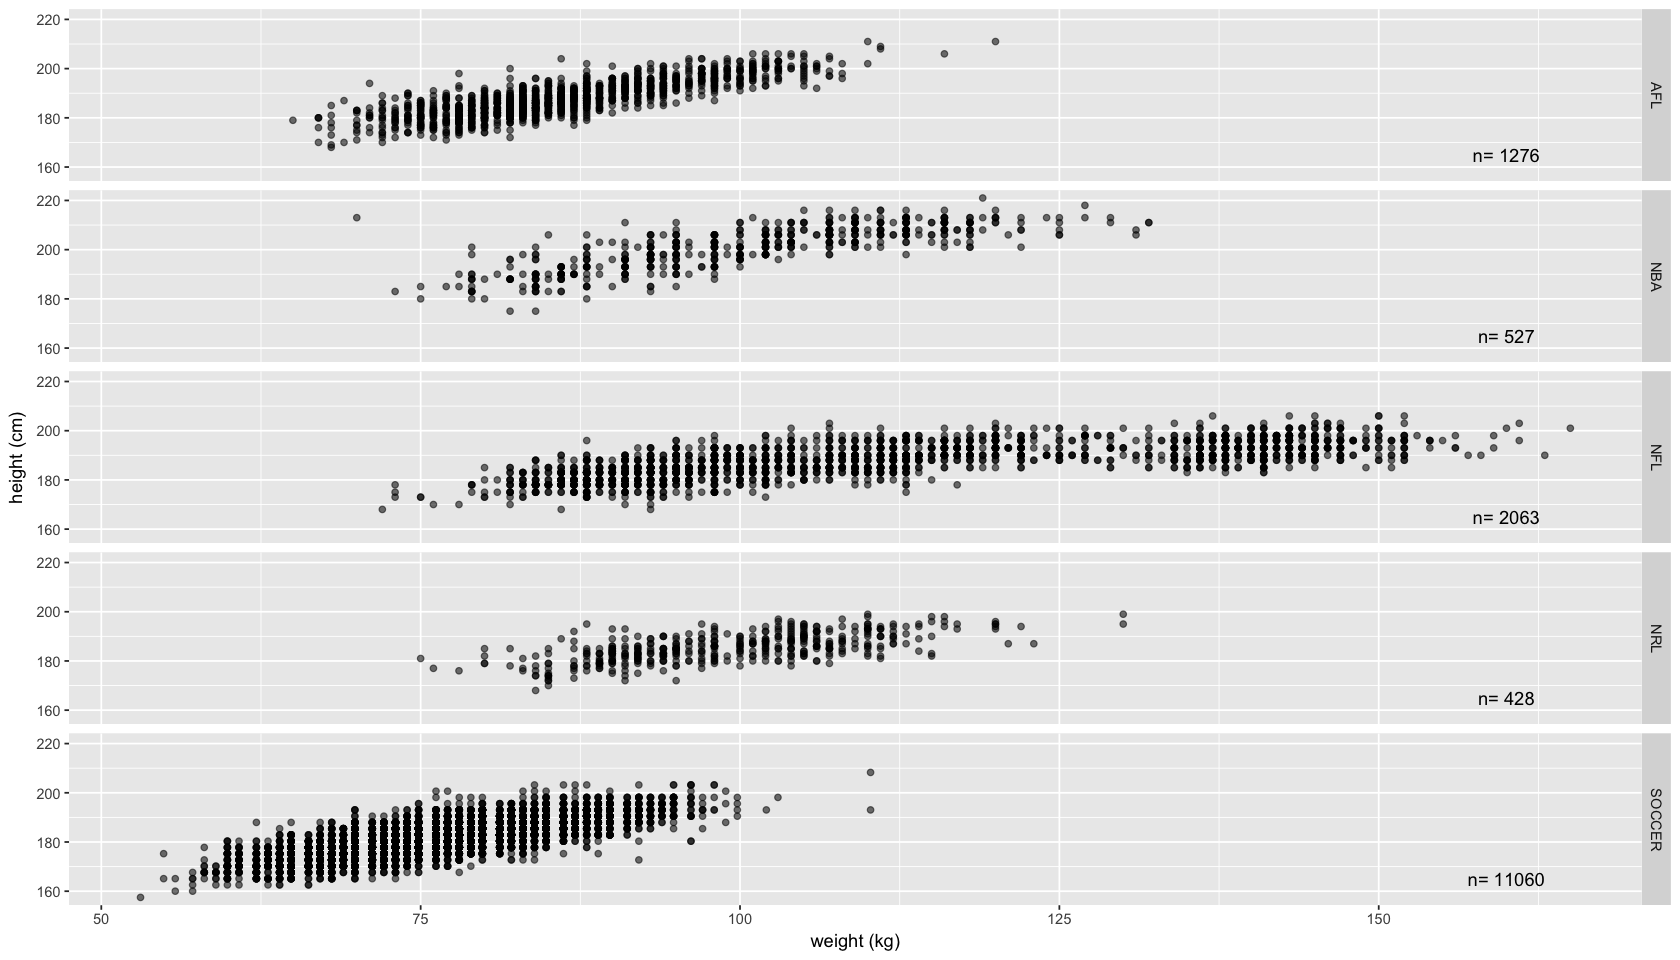

In [11]:
# get the data
url <- 'https://raw.githubusercontent.com/axelk2014/datablog/master/dfPlayersall.csv'
dfPlayers.all <- getURL(url) 
dfPlayers.all <- read.csv(textConnection(dfPlayers.all))

# get the notation
notation <- data.frame(dfPlayers.all %>% group_by(code) %>% dplyr::summarize(count=n()))

ggplot(data=dfPlayers.all, aes(x=weight,y=height)) + geom_point(aes(alpha=0.4)) +
  scale_y_continuous(limits=c(min(dfPlayers.all$height),max(dfPlayers.all$height))) +
  labs(x="weight (kg)", y="height (cm)") +
  facet_grid(code ~ .) + geom_text(x=160, y=165, data=notation, label=paste("n=",notation$count))+
  theme(legend.position="none") 


We can see that there are defnite clusters of data points, depending on sports code. The most surprising thing is the shear variance in NFL. Lets quantify the differences using summary statistics.

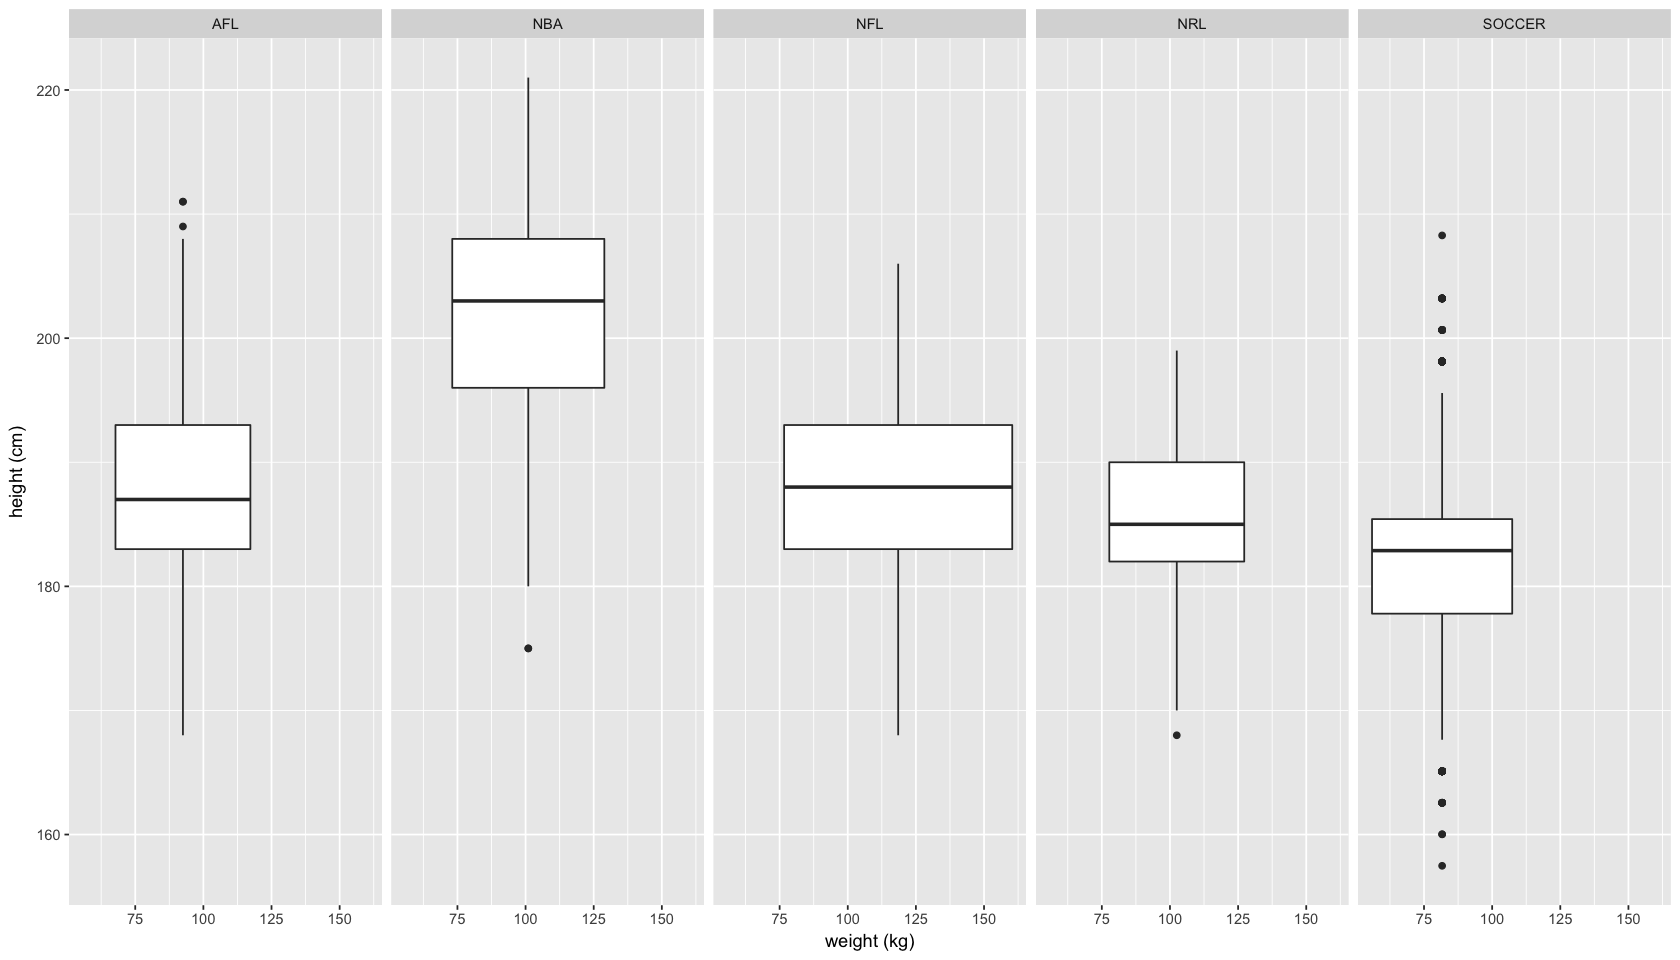

In [12]:
ggplot(data=dfPlayers.all, aes
       (x=weight,y=height),position_dodge()) + geom_boxplot() +
  facet_grid(.~ code) + labs(x="weight (kg)", y="height (cm)")

**Summary stats: Height (in cm)**

**Note:** Nicely styled formattables do not seem to render properly in Jupyter. So I have inserted the code as markdown and inserted resulting table plot as an image.

```
library(formattable)

formattable(dfPlayers.summaries.height, list(
  code = color_tile("white", "orange"),
  grade = formatter("span", style = x ~ ifelse(x == "A", 
                                               style(color = "green", font.weight = "bold"), NA)),
  area(col = c(`Max.   `)) ~ normalize_bar("lightblue",0.4)
))
```

![Summarystatseight](height.png)

**Summary stats: Weight (in kg)**

```
formattable(dfPlayers.summaries.weight, list(
  code = color_tile("white", "orange"),
  grade = formatter("span", style = x ~ ifelse(x == "A", 
                                               style(color = "green", font.weight = "bold"), NA)),
  area(col = c(`Max.   `)) ~ normalize_bar("lightblue",0.4)
))
```
![SummarystatsWeight](weight.png)

##### Analysis:
Looking at the maximum measure in height and weight between sports codes, the most interesting point is that the difference between the tallest NBA player (221cm) and the tallest NRL player (199cm) is 11% however the difference between the heaviest NFL player (165kg) and the heaviest soccer player (110kg) is 50%!

Looking at both the boxplots and the tables, we can see that the largest variance in height is in soccer (50cm) and the largest variance in weight is NFL (93kg).


##### Visualisation:
The advantage of using facets to plot similar data helps immensely to make quick comparative assessments. The box plots also provide additional information about the data along both axis - see how much wider the NFL boxplot is (along the x-axis or "weight") compared to the other boxplots, demonstrating the larger variance.

The styling of a normalised colour bar in the tables help you identify quickly the maximum value (ie. it is not just for show).

#### <a id="packages">Installed packages and technology stack</a>

Session Info:
```
R version 3.4.0 (2017-04-21)
Platform: x86_64-apple-darwin15.6.0 (64-bit)
Running under: OS X El Capitan 10.11.6

Matrix products: default
BLAS: /System/Library/Frameworks/Accelerate.framework/Versions/A/Frameworks/vecLib.framework/Versions/A/libBLAS.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/3.4/Resources/lib/libRlapack.dylib

locale:
[1] en_AU.UTF-8/en_AU.UTF-8/en_AU.UTF-8/C/en_AU.UTF-8/en_AU.UTF-8

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] webshot_0.4.0       htmltools_0.3.6     knitr_1.15.1       
 [4] pander_0.6.0        readr_1.1.0         RColorBrewer_1.1-2 
 [7] plotly_4.6.0        formattable_0.2.0.1 DBI_0.6-1          
[10] gridExtra_2.2.1     rvest_0.3.2         xml2_1.1.1         
[13] XML_3.98-1.6        data.table_1.10.4   reshape_0.8.6      
[16] reshape2_1.4.2      ggplot2_2.2.1       plyr_1.8.4         
[19] stringr_1.2.0       RCurl_1.95-4.8      bitops_1.0-6       
[22] dplyr_0.5.0         RSQLite_1.1-2      

Notebook:

IRdisplay    "0.4.4"           
IRkernel     "0.8.6.9000
```

#### <a id="data-sources">Data sources:</a>
| Data source| Notes|
|------------|------|
|[aussportbetting.com](http://www.aussportsbetting.com/data/historical-afl-results-and-odds-data/)|for fixtures of all games since 2009|
|[wikipedia.org](https://en.wikipedia.org/wiki/List_of_Australian_Football_League_grounds)|for locations and names of the grounds|
|[bom.gov.au](http://www.bom.gov.au/) & [google.com.au/maps](https://www.google.com.au/maps)| to work out the nearest weather stations and to download the relevant temperature and rainfall data |
|[afltables.com](http://afltables.com/afl/afl_index.html)|for the personal stats on AFL players|
|[bigfooty.com](https://www.bigfooty.com/forum/threads/afl-colours-guide.810014/page-2)|AFL team colours manually transcribed from this thread|
|[manually created Google Sheet CSV](https://docs.google.com/spreadsheets/d/1tJKEJj4cfXjdgVQvXgkMKZaPzhosNkeJ2GtrgYIINuE/pub?output=csv)|CSV created with team colours from the above thread|
|[nfl.com](http://www.nfl.com/teams)|for the personal stats on NFL players|
|[zerotackle.com](https://www.zerotackle.com)|for the personal stats on NRL players|
|[kaggle.com](https://www.kaggle.com/hugomathien/soccer)|for the personal stats on all European Soccer players|
|[besttickets.com](http://www.besttickets.com/blog/wp-content/uploads/2013/12/NBA-Census-10.14.2013.csv)|for the stats on NBA players (2013)|


#### Acknowledgements:
I borrowed heavily from the following to setup the folder structure for this project:
* Cookie Cutter Data Science (http://drivendata.github.io/cookiecutter-data-science/) and
* A Quick Guide to Organizing Computational Biology Projects (http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1000424) 
* Setting up clean R projects https://nicercode.github.io/blog/2013-04-05-projects/


___
> <a id="footnote1" href="#footnote1ref"><sup>1 </sup></a> Note for overseas readers: In Aussie rules (AFL), a **goal** is worth 6 points and is awarded when the football is kicked through the gap between the taller center goal posts, and a **behind** or a **point** is worth, well.. one point. 
![MCG_small.jpeg](MCG_small.jpeg)
*original image source: http://www.mcg.org.au/*